In [20]:
%load_ext autoreload
%autoreload 2

In [1]:
import xarray
data = xarray.open_dataset("/homes/starrgw1/code/gnss-tid/outputs/2024-12-05/11-53-42/autofocus.h5")

creating frames:   0%|          | 0/109 [00:00<?, ?it/s]

Saving video:   0%|          | 0/109 [00:00<?, ?it/s]

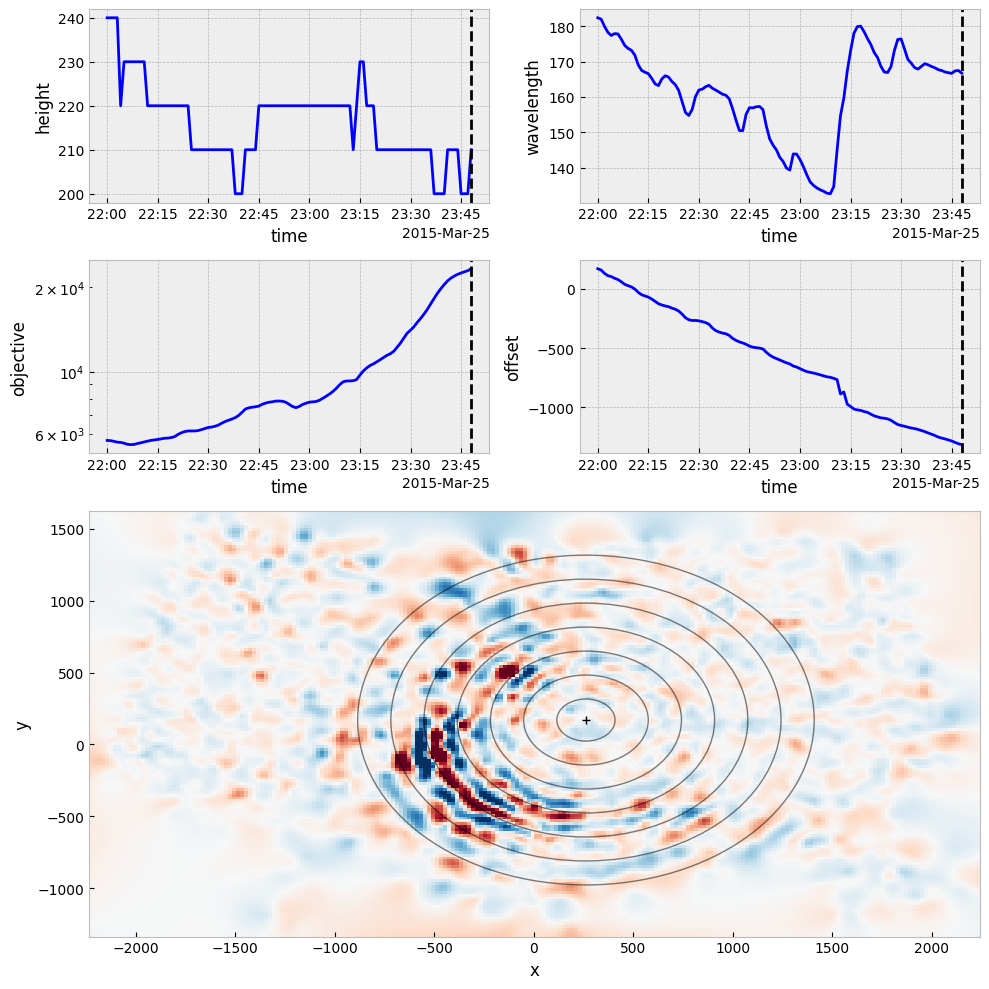

In [49]:
import gnss_tid.plotting

gnss_tid.plotting.make_animation(data, "plots/event.gif")

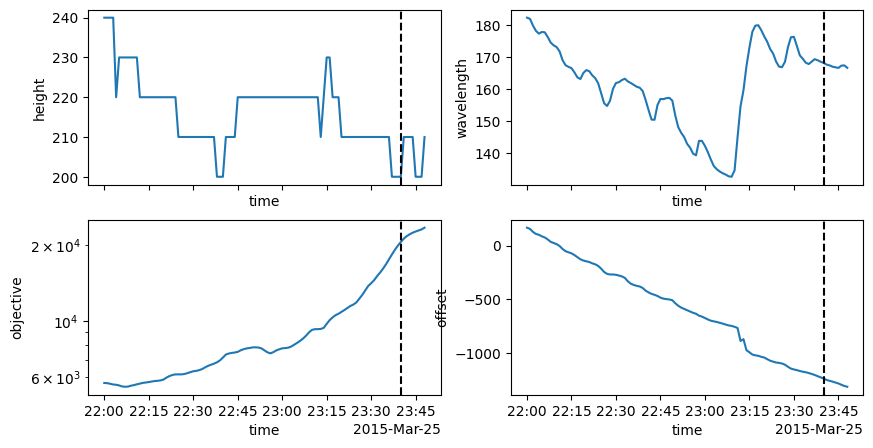

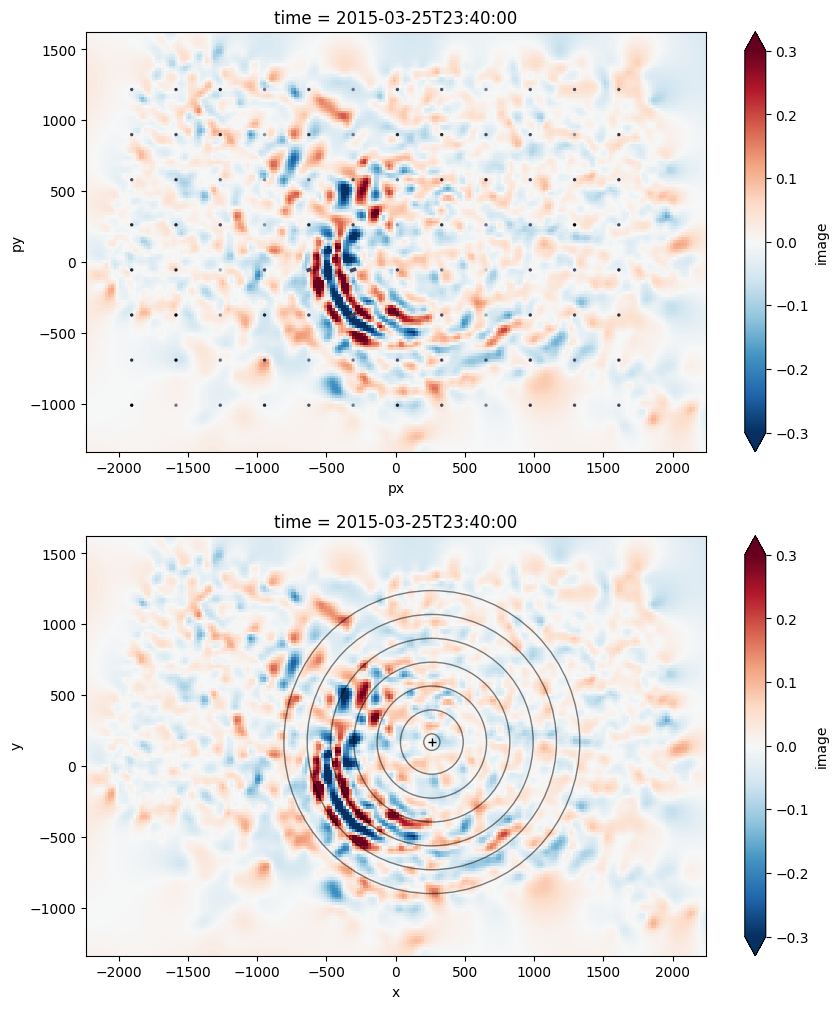

In [7]:
from matplotlib import pyplot as plt
import numpy as np
from gnss_tid.plotting import plot_patches, plot_circles

ii = 100

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
data.height.plot(ax=ax[0, 0])
data.wavelength.plot(ax=ax[0, 1])
data.objective.plot(ax=ax[1, 0], yscale="log")
data.offset.plot(ax=ax[1, 1])
ax[0, 0].axvline(data.time.values[ii], color="k", linestyle='--')
ax[0, 1].axvline(data.time.values[ii], color="k", linestyle='--')
ax[1, 0].axvline(data.time.values[ii], color="k", linestyle='--')
ax[1, 1].axvline(data.time.values[ii], color="k", linestyle='--')

fig, ax = plt.subplots(2, 1, figsize=(10, 12))
plot_patches(data.isel(time=ii), ax=ax[0], scale_base=50)
data.isel(time=ii).image.plot(ax=ax[1], vmax=.3)
plot_circles(data.center, data.wavelength.isel(time=ii), data.offset.isel(time=ii), ax=ax[1])

- weight loss by data density
- constant center location
- some constraint on the focus height
    - smooth path height over time